# Task 2.4 Visualization Fundamentals

In [1]:
# import libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns

In [3]:
# import necessary columns from csv file
dtype_mapping = {6: str} # force column as string data types
df = pd.read_csv('NY_Citi_Bike_Weather_Data.csv', usecols=['date', 'avgTemp', 'ride_id', 'start_station_name', 'rideable_type', 
    'member_casual'], dtype=dtype_mapping)

In [5]:
# add new column of total trip counts by date
df['trip_count'] = df.groupby('date')['ride_id'].transform('count')

In [7]:
# create another smaller df for processing reasons
df_sample = df.groupby('date', group_keys=False).apply(lambda x: x.sample(frac=0.1, random_state=42))

C:\Users\lisag\AppData\Local\Temp\ipykernel_14960\946701750.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sample = df.groupby('date', group_keys=False).apply(lambda x: x.sample(frac=0.1, random_state=42))


In [9]:
df_sample.columns

Index(['ride_id', 'rideable_type', 'start_station_name', 'member_casual',
       'date', 'avgTemp', 'trip_count'],
      dtype='object')

In [11]:
df_sample.shape

(2983883, 7)

In [13]:
df_sample['date'] = pd.to_datetime(df_sample['date'])

In [15]:
df_sample.dtypes

ride_id                       object
rideable_type                 object
start_station_name            object
member_casual                 object
date                  datetime64[ns]
avgTemp                      float64
trip_count                     int64
dtype: object

In [17]:
df_sample = df_sample.set_index('date')

In [19]:
df_sample.head()

,ride_id,rideable_type,start_station_name,member_casual,avgTemp,trip_count
date,,,,,,
2022-01-01,17CAE86EB6452614,classic_bike,Grand St & Greene St,member,11.6,20763
2022-01-01,97F64F760630BEA9,classic_bike,24 St & 5 Ave,member,11.6,20763
2022-01-01,BC170BC3C4B22E80,electric_bike,Greenpoint Ave & Manhattan Ave,member,11.6,20763
2022-01-01,E8036EE0B9BDE354,electric_bike,Broadway & Berry St,member,11.6,20763
2022-01-01,3BED0769F5A1A716,classic_bike,E 13 St & Avenue A,member,11.6,20763


# Visualization Themes

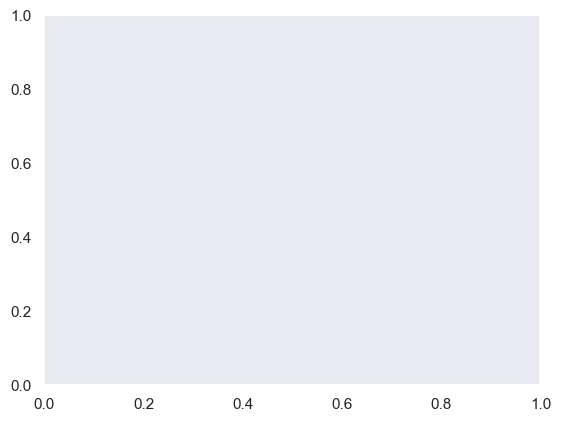

In [22]:
# set theme, style, and color
sns.set_theme(style="dark", palette="Purples")
# disable scientific notation
plt.ticklabel_format(style='plain', axis='both')

# Bar Chart

In [25]:
df_sample['value'] = 1

In [27]:
# create new column for count of stations
df_stations = df_sample.groupby('start_station_name')['value'].count().reset_index()

In [29]:
df_stations

,start_station_name,value
0,1 Ave & E 110 St,2170
1,1 Ave & E 16 St,6621
2,1 Ave & E 18 St,7159
3,1 Ave & E 30 St,4409
4,1 Ave & E 39 St,5302
...,...,...
1754,Wyckoff Ave & Gates Ave,1676
1755,Wyckoff St & 3 Ave,26
1756,Wyckoff St & Nevins St,1154
1757,Wythe Ave & Metropolitan Ave,6706


In [31]:
# create df of top 20 stations
top20_stations = df_stations.nlargest(20, 'value')

In [33]:
top20_stations

,start_station_name,value
1585,W 21 St & 6 Ave,12728
1716,West St & Chambers St,12260
495,Broadway & W 58 St,11600
286,6 Ave & W 33 St,10815
8,1 Ave & E 68 St,10514
461,Broadway & E 14 St,9921
485,Broadway & W 25 St,9795
463,Broadway & E 21 St,9599
1509,University Pl & E 14 St,9514
1601,W 31 St & 7 Ave,9432


C:\Users\lisag\AppData\Local\Temp\ipykernel_14960\4036684895.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top20_stations, x = 'value', y = 'start_station_name', palette=("magma"))


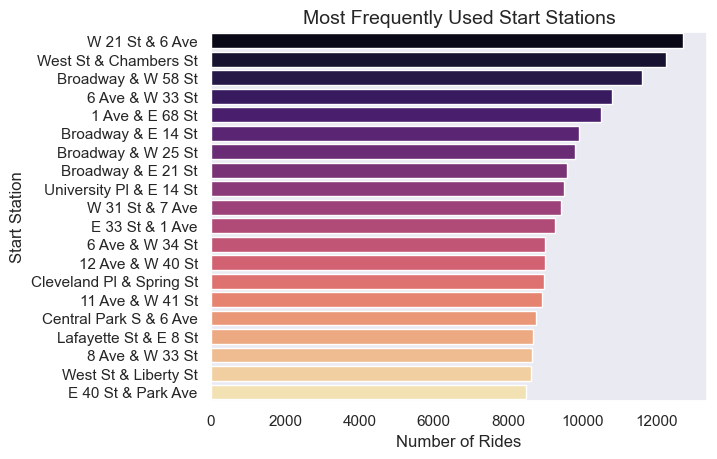

In [58]:
# create bar plot
sns.barplot(data = top20_stations, x = 'value', y = 'start_station_name', palette=("magma"))
# set axis labels and title
plt.xlabel("Number of Rides", fontsize=12)
plt.ylabel("Start Station", fontsize=12)
plt.title("Most Frequently Used Start Stations", fontsize=14)
plt.show()

#### The formatting of the visualization as a standard didn't work. Tried a few different hues/colors and this seemed to work the best.

# Dual-Axis Line Plot

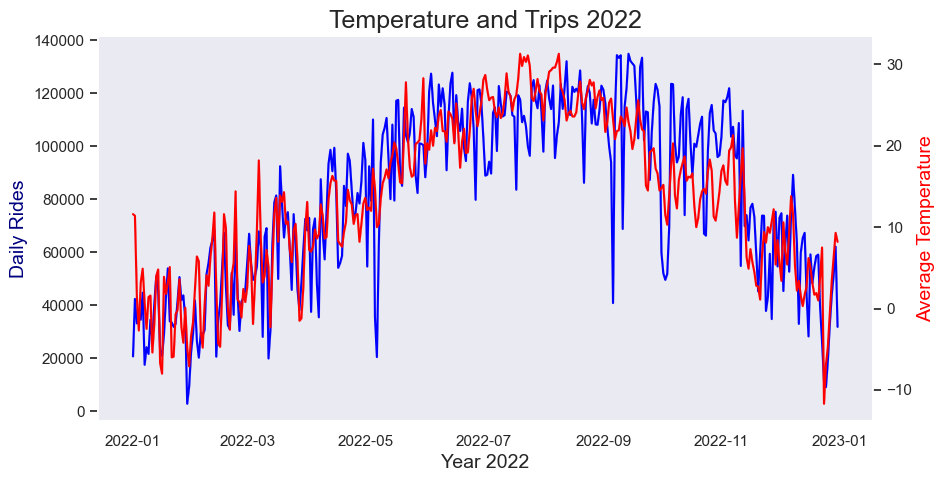

In [63]:
fig,ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data = df_sample['trip_count'], color = "b")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Daily Rides",color = "navy", fontsize = 14) # set y-axis label

ax2 = ax.twinx()
sns.lineplot(data = df_sample['avgTemp'], color="r", ax=ax2)
ax2.set_ylabel("Average Temperature", color = "red",fontsize=14)
plt.title('Temperature and Trips 2022', fontsize = 18)
plt.show()

# Box and Wisker Plot

C:\Users\lisag\AppData\Local\Temp\ipykernel_14960\1249902624.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'trip_count', y = 'member_casual', data = df_sample, palette = {'member': 'royalblue', 'casual': 'green'})


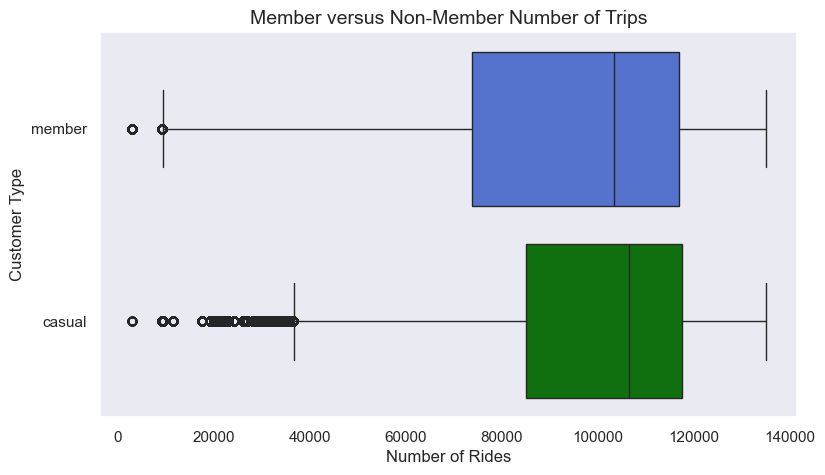

In [77]:
plt.figure(figsize=(9,5))
sns.boxplot(x = 'trip_count', y = 'member_casual', data = df_sample, palette = {'member': 'royalblue', 'casual': 'green'})
plt.xlabel("Number of Rides", fontsize=12)
plt.ylabel("Customer Type", fontsize=12)
plt.title("Member versus Non-Member Number of Trips", fontsize=14)
plt.show()

#### This box and wisker plot gives a few insights into customer behavior. Not surprisingly, members account for more rides than their casual counterparts. However, the median number of rides is higher with casual riders. The max is the same but there is a lower threshold for members on the minimum end. Likely, the company would want to encourage membership.

# FacetGrid

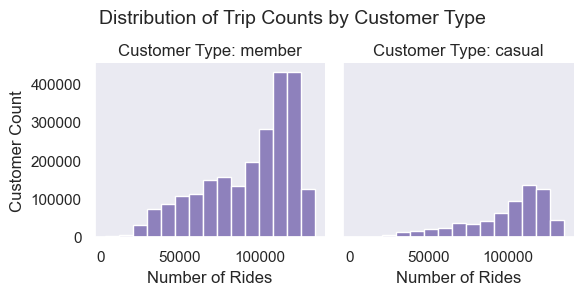

In [105]:
grid = sns.FacetGrid(df_sample, col = "member_casual")
grid.map(sns.histplot, "trip_count", bins = 15, color=sns.color_palette("Purples")[4])
# set the title format for each subplot
grid.set_titles("Customer Type: {col_name}")
# set axis labels
grid.set_axis_labels("Number of Rides", "Customer Count")
# adjust overall title
plt.subplots_adjust(top=0.8)  # adjust to fit title
grid.fig.suptitle("Distribution of Trip Counts by Customer Type", fontsize=14)
plt.show()

#### This affirms what was seen partially in the box and wisker plot. It is beneficial to promote membership as members take far more trips. There are also far more members than casual riders which would indicate loyalty might be a factor in customer usage. 